In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

pd.set_option('display.max_columns', None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [ ]:
drive='/content/drive/My Drive/yelp/'

In [ ]:
users = pd.read_csv(drive+'final_user_train_data.csv')
reviews = pd.read_csv(drive+'final_review_train_data.csv')

## **1** **EDA** 

### **1.1 Users Data EDA**

### Summary

In [ ]:
users.head(2)

,user_id,review_count,yelping_since,useful,funny,cool,elite,friends,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,estimated_state,first_review_date,last_review_date,state,state_review_count,review_cnt_rt,total_review_minus,recency,review_start_days
0,8ZryN_S-n48g6rsa3W3QtQ,2474,2008-10-27,51923,42361,46814,2009-2010-2012-2013-2014-2015-2016-2017-2018,2084,365,3.35,4967,623,349,105,136,1746,2794,4843,4843,2492,1797,NV,2009-07-28,2019-04-24,NV,42,43,2431,233.0,274.0
1,ENgL9AxV7uu-v5EUCpF69Q,1070,2008-10-01,3892,2665,2665,2010-2011-2012-2013-2014-2015-2016-2017-2018,440,95,3.66,29,5,1,0,0,61,95,146,146,80,24,NV,2009-02-22,2019-01-10,NV,21,24,1046,337.0,144.0


In [ ]:
users.columns

Index(['user_id', 'review_count', 'yelping_since', 'useful', 'funny', 'cool',
       'elite', 'friends', 'fans', 'average_stars', 'compliment_hot',
       'compliment_more', 'compliment_profile', 'compliment_cute',
       'compliment_list', 'compliment_note', 'compliment_plain',
       'compliment_cool', 'compliment_funny', 'compliment_writer',
       'compliment_photos', 'estimated_state', 'first_review_date',
       'last_review_date', 'state', 'state_review_count', 'review_cnt_rt',
       'total_review_minus', 'recency', 'review_start_days'],
      dtype='object')

In [ ]:
users.shape

(8162, 30)

### check missing values


In [ ]:
users.isnull().sum()

user_id               0
review_count          0
yelping_since         0
useful                0
funny                 0
cool                  0
elite                 0
friends               0
fans                  0
average_stars         0
compliment_hot        0
compliment_more       0
compliment_profile    0
compliment_cute       0
compliment_list       0
compliment_note       0
compliment_plain      0
compliment_cool       0
compliment_funny      0
compliment_writer     0
compliment_photos     0
estimated_state       0
first_review_date     0
last_review_date      0
state                 0
state_review_count    0
review_cnt_rt         0
total_review_minus    0
recency               0
review_start_days     0
dtype: int64

In [ ]:
len(users[users.user_id.duplicated()])

0

### Histogram

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

In [ ]:
his_users=users[['review_count', 'useful', 'funny', 'cool',
       'friends', 'fans', 'average_stars',
        'state_review_count', 'review_cnt_rt',
       'total_review_minus', 'recency', 'review_start_days']]


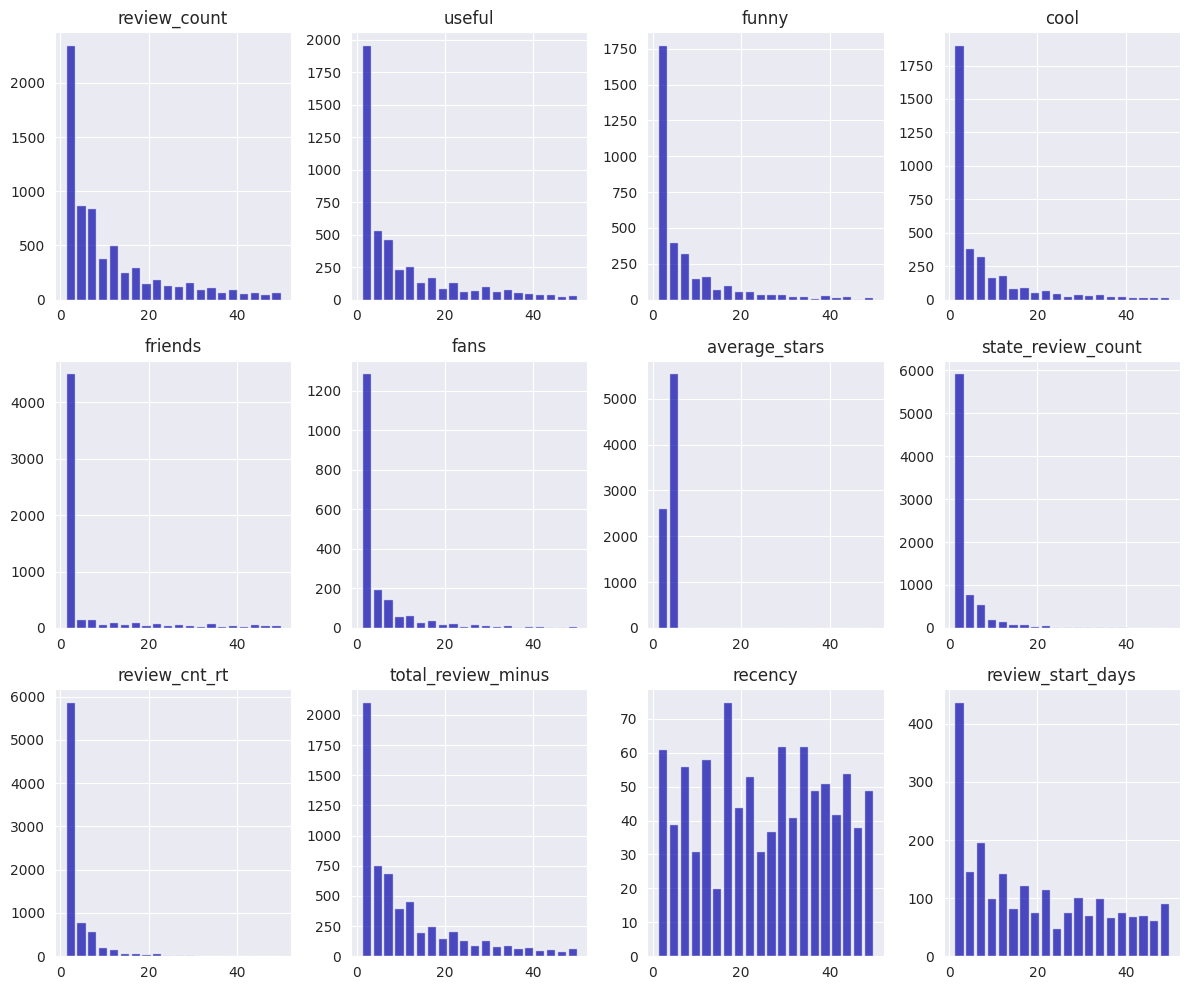

In [ ]:
plt.rcParams.update({'figure.figsize':(12,10), 'figure.dpi':100})
f,a = plt.subplots(3,4)
a = a.ravel()
for idx,ax in enumerate(a):
    ax.hist(his_users.iloc[:,idx],bins=20,range=[1,50],color='#0504aa',alpha=0.7, rwidth=0.85)
    ax.set_title(his_users.columns[idx])
plt.tight_layout()

### Pairplot 



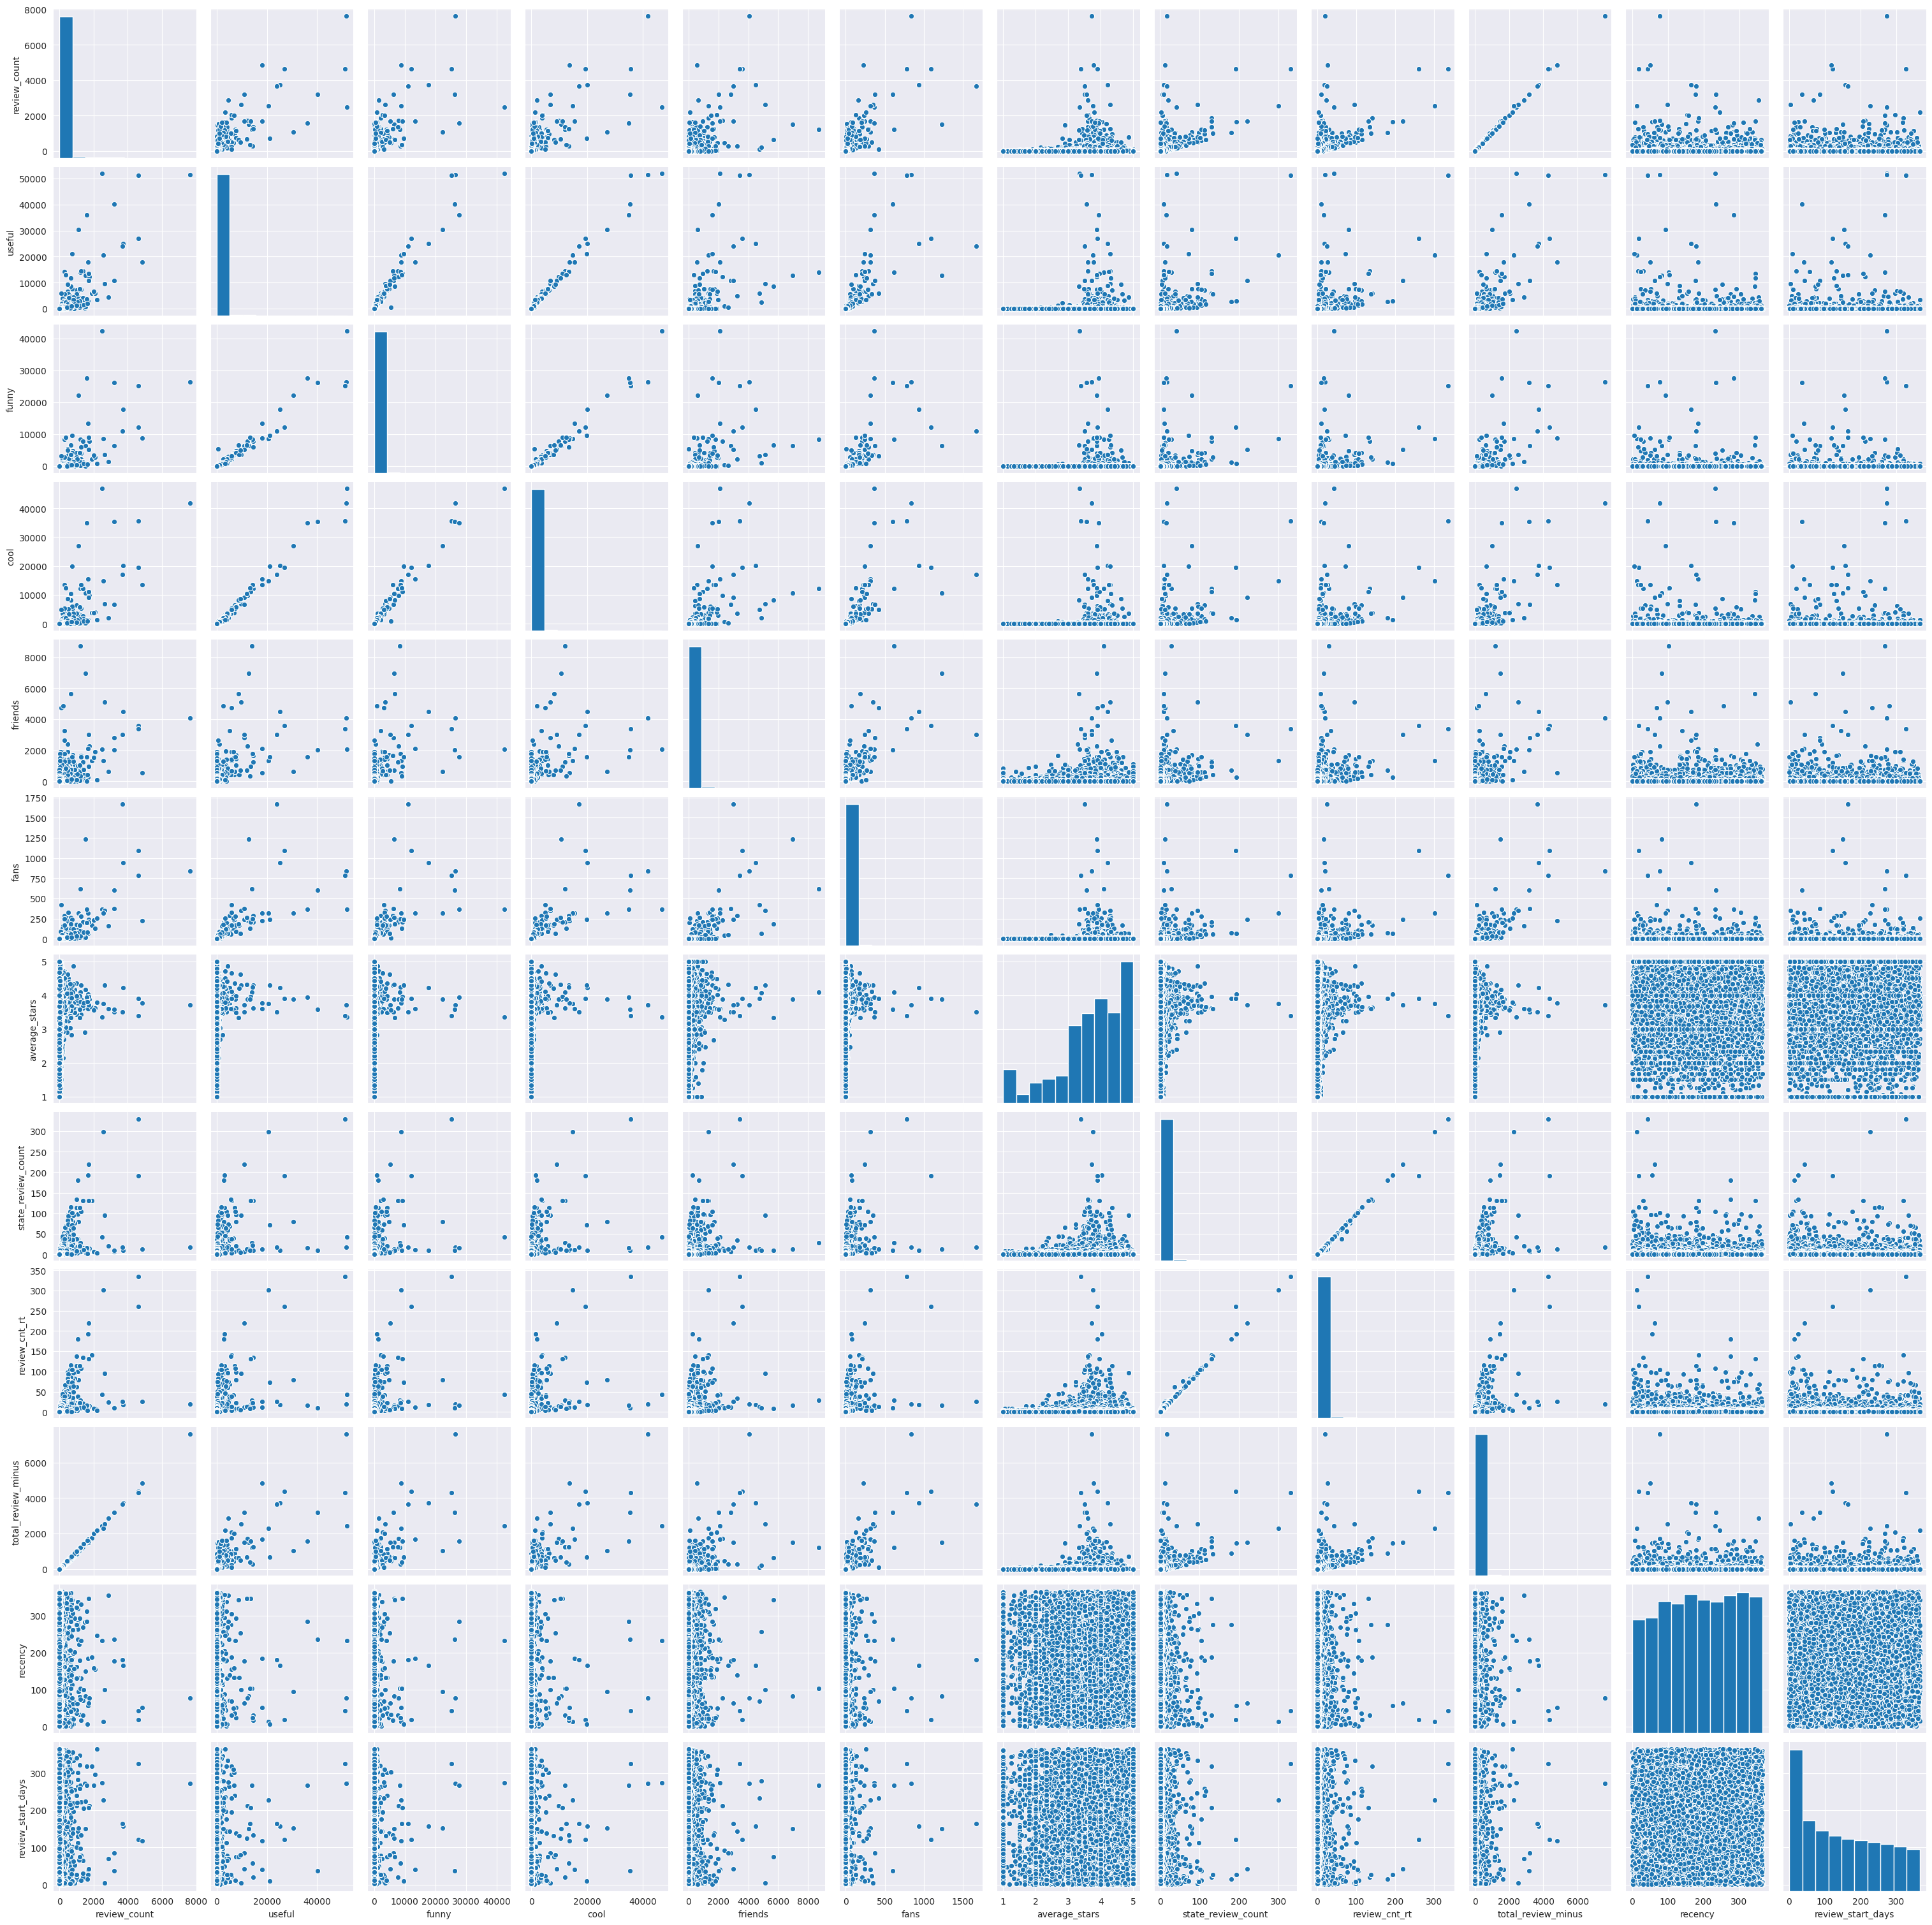

In [ ]:
import seaborn as sns
sns.pairplot(his_users)


### Correlation

In [ ]:
corr = his_users.corr()
corr

,review_count,useful,funny,cool,friends,fans,average_stars,state_review_count,review_cnt_rt,total_review_minus,recency,review_start_days
review_count,1.000000,0.790349,0.696148,0.735699,0.554452,0.764535,0.017067,0.554439,0.578923,0.998895,-0.054677,0.012274
useful,0.790349,1.000000,0.972518,0.992625,0.556102,0.782374,0.008309,0.451346,0.464633,0.789067,-0.037114,0.010707
funny,0.696148,0.972518,1.000000,0.984738,0.504428,0.702791,0.005504,0.363376,0.373028,0.697107,-0.026758,0.011721
cool,0.735699,0.992625,0.984738,1.000000,0.535957,0.746247,0.009598,0.398582,0.409855,0.735812,-0.033547,0.009656
friends,0.554452,0.556102,0.504428,0.535957,1.000000,0.694349,0.036142,0.367426,0.377325,0.550591,-0.030714,0.012502
fans,0.764535,0.782374,0.702791,0.746247,0.694349,1.000000,0.015024,0.407201,0.432264,0.764286,-0.042469,0.006637
average_stars,0.017067,0.008309,0.005504,0.009598,0.036142,0.015024,1.000000,0.020719,0.020619,0.016429,0.023242,-0.012258
state_review_count,0.554439,0.451346,0.363376,0.398582,0.367426,0.407201,0.020719,1.000000,0.996577,0.514880,-0.093708,-0.033890
review_cnt_rt,0.578923,0.464633,0.373028,0.409855,0.377325,0.432264,0.020619,0.996577,1.000000,0.539957,-0.093253,-0.032916
total_review_minus,0.998895,0.789067,0.697107,0.735812,0.550591,0.764286,0.016429,0.514880,0.539957,1.000000,-0.051065,0.014568


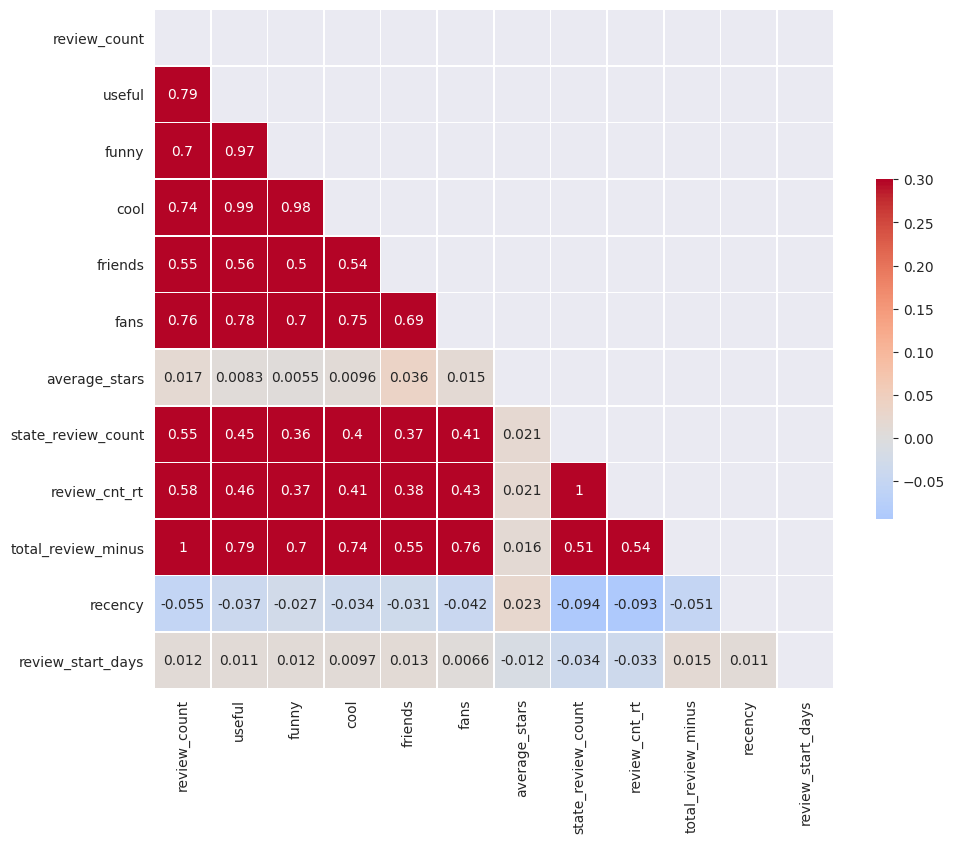

In [ ]:

mask = np.triu(np.ones_like(corr, dtype=np.bool))

f, ax = plt.subplots(figsize=(11, 9))

sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=.3, center=0, annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Insights


1.   Users table has 8162 rows,30 columns, and no missing data.
2.   The review counts has a strong correlation with useful, funny, cool, friends and fans.
3.   Useful has a strong correlation with funny, cool, friends, fans, and total review count
4.   Funny has a strong correlation with cool, friends,fans.
5.   This indicats PCA might be a useful tool to model.




### **1.2 Reviews Data EDA**

### Summary

In [ ]:
reviews.head(3)

,review_id,user_id,business_id,review_star,useful,funny,cool,review_date,name,address,city,state,postal_code,latitude,longitude,biz_star,biz_review_count,is_open,attributes.BusinessAcceptsCreditCards,attributes.ByAppointmentOnly,attributes.DogsAllowed,attributes.BikeParking,attributes.BusinessParking,attributes.RestaurantsPriceRange2,categories,hours.Monday,hours.Tuesday,hours.Wednesday,hours.Thursday,hours.Friday,text,tip_date,compliment_count,checkin_date
0,slmv7dEs9FD3KsdbywTHUw,Ir__fU1m6dBqgTrP3aLP9A,KalAJyO0Zpg3K1wVwYXBHA,5.0,1.0,0.0,0.0,2009-05-20 02:16:00,Marché Bacchus,"2620 Regatta Dr, Ste 106",Las Vegas,NV,89128,36.207539,-115.268154,3.5,817.0,1.0,True,NaN,False,True,"{'garage': False, 'street': True, 'validated':...",3,"Food, Beer, Wine & Spirits, Wine Bars, Nightli...",11:0-21:0,11:0-21:0,11:0-21:0,11:0-21:0,11:0-22:0,Monday is no corkage fee,2012-07-03 01:36:03,0.0,"2010-05-02 02:02:25, 2010-05-02 02:07:43, 2010..."
1,I_cUJOHjSzWmMpr8x6M7Yw,Ir__fU1m6dBqgTrP3aLP9A,Ti7UFcA0g5QpflvxsUpa3g,4.0,0.0,0.0,0.0,2016-03-24 20:35:03,Fantastic Nails,"9285 S Cimarron Rd, Ste 115",Las Vegas,NV,89178,36.019656,-115.271216,3.0,140.0,1.0,True,False,NaN,True,"{'garage': False, 'street': False, 'validated'...",2,"Waxing, Hair Removal, Beauty & Spas, Nail Salons",9:0-19:0,9:0-19:0,9:0-19:0,9:0-19:0,9:0-19:0,NaN,NaN,NaN,"2010-10-28 19:18:34, 2010-11-23 22:38:34, 2011..."
2,6u-I0OiK44WWkEC9lH33OQ,Ir__fU1m6dBqgTrP3aLP9A,IVKVk7ZAPdQi6S40UX0zyg,5.0,1.0,1.0,0.0,2016-03-24 20:42:05,Barking Dogs Self-Wash & Grooming,"9325 S Cimarron Rd, Ste 145",Las Vegas,NV,89178,36.018687,-115.271303,4.5,282.0,1.0,NaN,False,NaN,NaN,NaN,NaN,"Pet Groomers, Pet Stores, Pets, Pet Services",0:0-0:0,9:0-19:0,9:0-19:0,9:0-19:0,9:0-19:0,Bathtime,2012-10-22 17:36:58,0.0,"2010-08-11 03:48:05, 2010-08-13 01:50:22, 2010..."


In [ ]:
reviews.columns

Index(['review_id', 'user_id', 'business_id', 'review_star', 'useful', 'funny',
       'cool', 'review_date', 'name', 'address', 'city', 'state',
       'postal_code', 'latitude', 'longitude', 'biz_star', 'biz_review_count',
       'is_open', 'attributes.BusinessAcceptsCreditCards',
       'attributes.ByAppointmentOnly', 'attributes.DogsAllowed',
       'attributes.BikeParking', 'attributes.BusinessParking',
       'attributes.RestaurantsPriceRange2', 'categories', 'hours.Monday',
       'hours.Tuesday', 'hours.Wednesday', 'hours.Thursday', 'hours.Friday',
       'text', 'tip_date', 'compliment_count', 'checkin_date'],
      dtype='object')

In [ ]:
reviews.shape

(39063, 34)

### Check missing data

In [ ]:
reviews.isnull().sum()

review_id                                    0
user_id                                      0
business_id                                  0
review_star                                  0
useful                                       0
funny                                        0
cool                                         0
review_date                                  0
name                                         0
address                                      0
city                                         0
state                                        0
postal_code                                  0
latitude                                     0
longitude                                    0
biz_star                                     0
biz_review_count                             0
is_open                                      0
attributes.BusinessAcceptsCreditCards     2513
attributes.ByAppointmentOnly             22673
attributes.DogsAllowed                   19482
attributes.Bi

### Histogram

In [ ]:
his_reviews=reviews[[ 'review_star', 'useful', 'funny',
       'cool',  'biz_star', 'biz_review_count']]



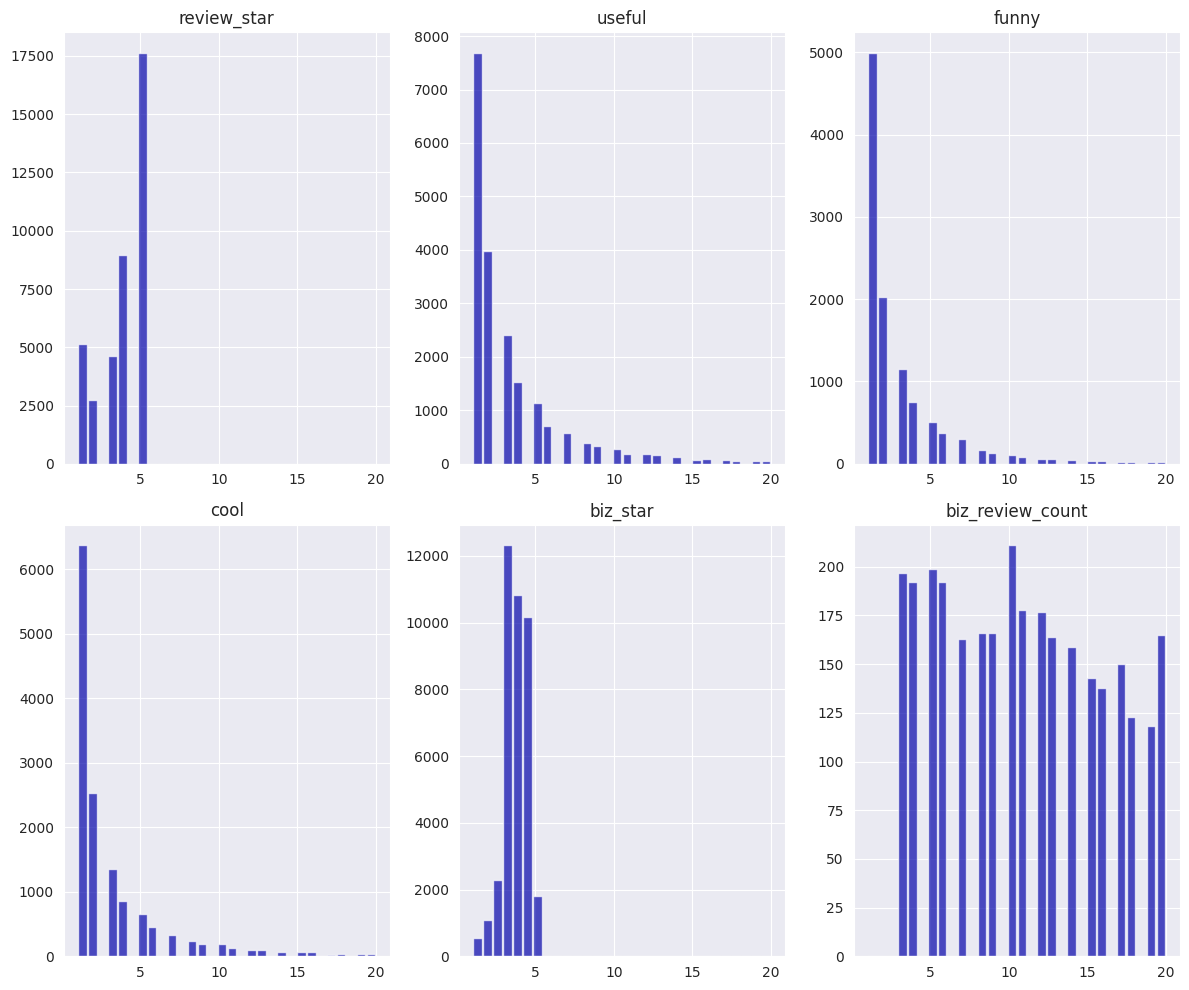

In [ ]:
plt.rcParams.update({'figure.figsize':(12,10), 'figure.dpi':100})
f,a = plt.subplots(2,3)
a = a.ravel()
for idx,ax in enumerate(a):
    ax.hist(his_reviews.iloc[:,idx],bins=30,range=[1,20],color='#0504aa',alpha=0.7, rwidth=0.85)
    ax.set_title(his_reviews.columns[idx])
plt.tight_layout()

### Pairplot

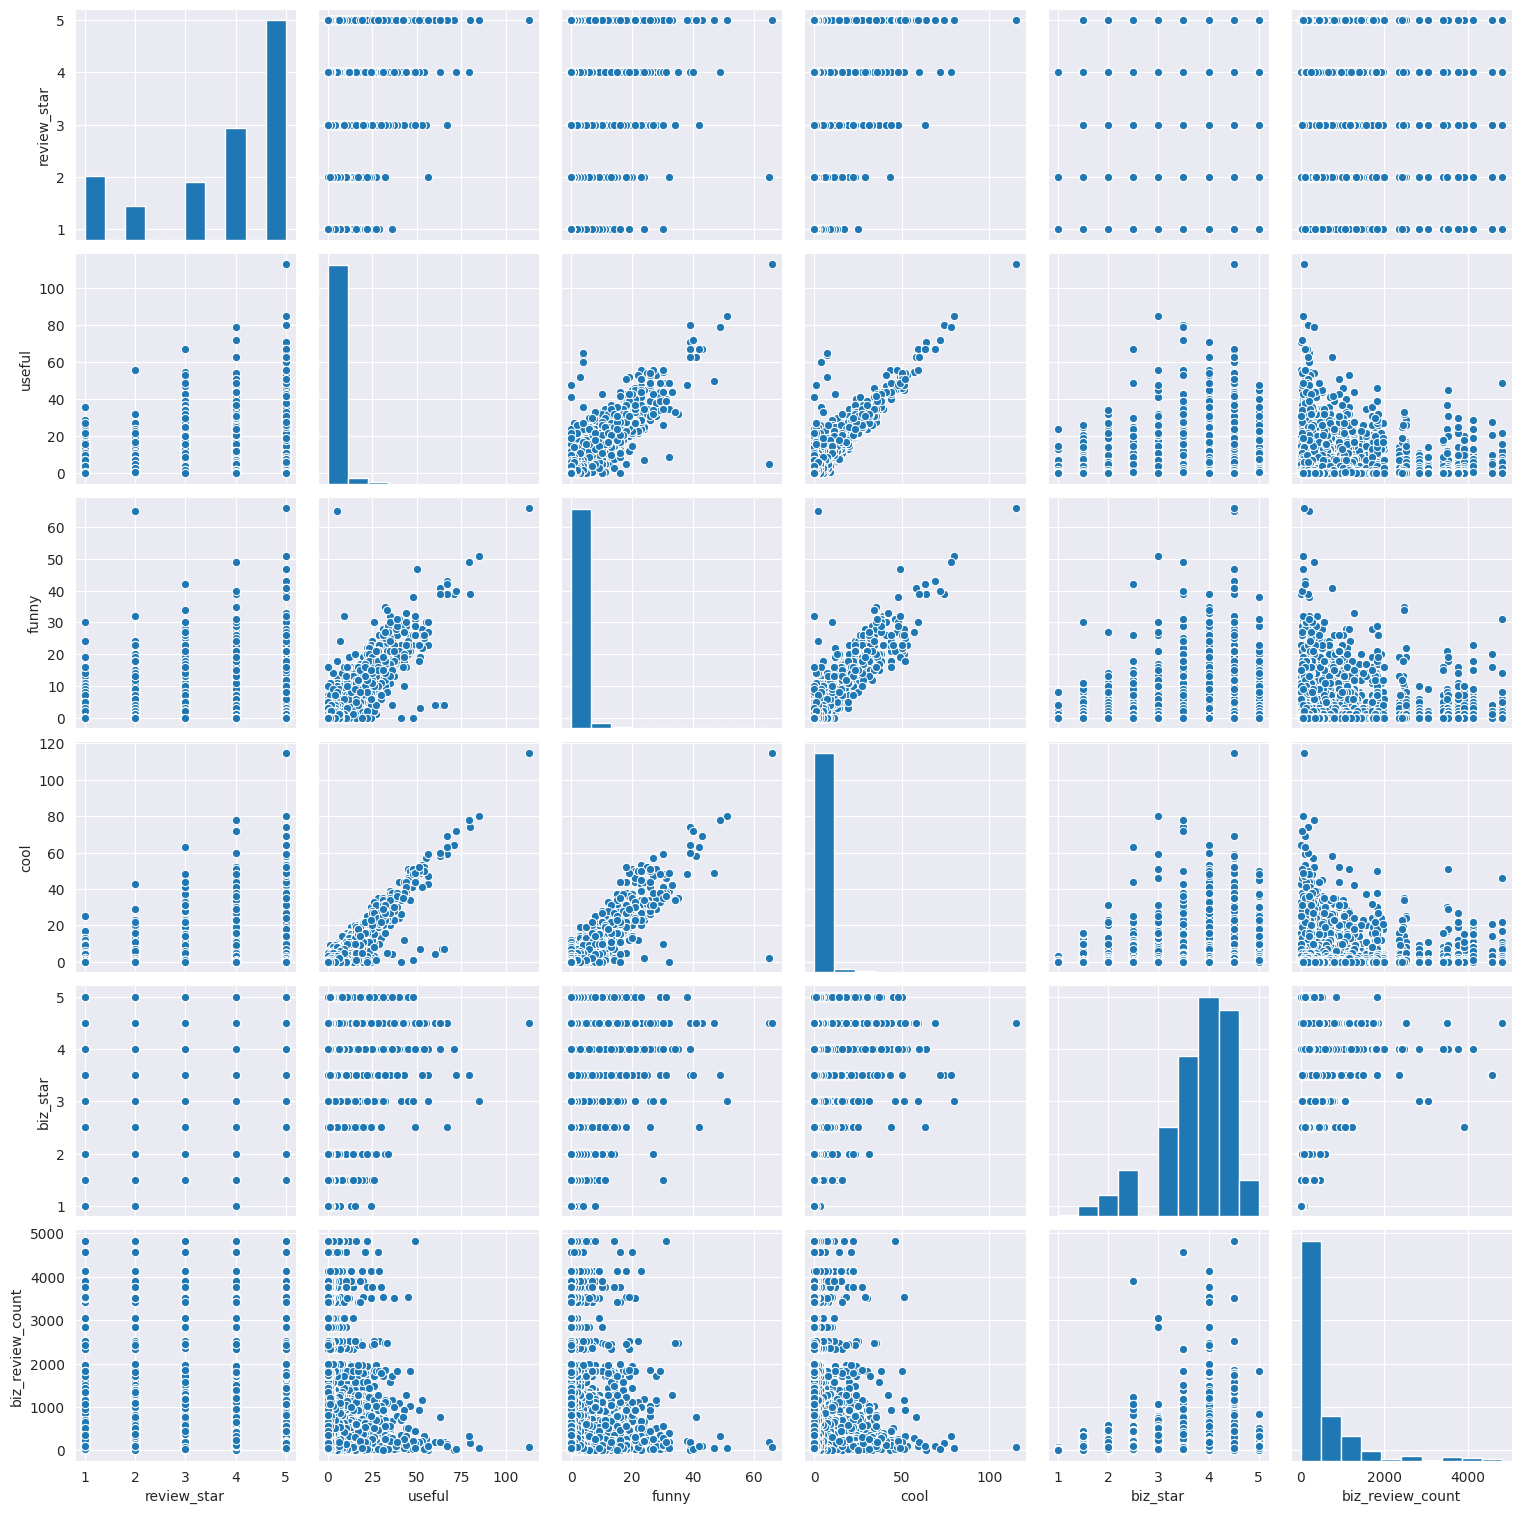

In [ ]:
sns.pairplot(his_reviews)

### Correlation

In [ ]:
corr = his_reviews.corr()
corr

,review_star,useful,funny,cool,biz_star,biz_review_count
review_star,1.000000,-0.009617,-0.015188,0.077009,0.447520,0.070069
useful,-0.009617,1.000000,0.861429,0.909123,0.039478,0.017846
funny,-0.015188,0.861429,1.000000,0.897212,0.030022,0.036141
cool,0.077009,0.909123,0.897212,1.000000,0.075770,0.039944
biz_star,0.447520,0.039478,0.030022,0.075770,1.000000,0.151868
biz_review_count,0.070069,0.017846,0.036141,0.039944,0.151868,1.000000


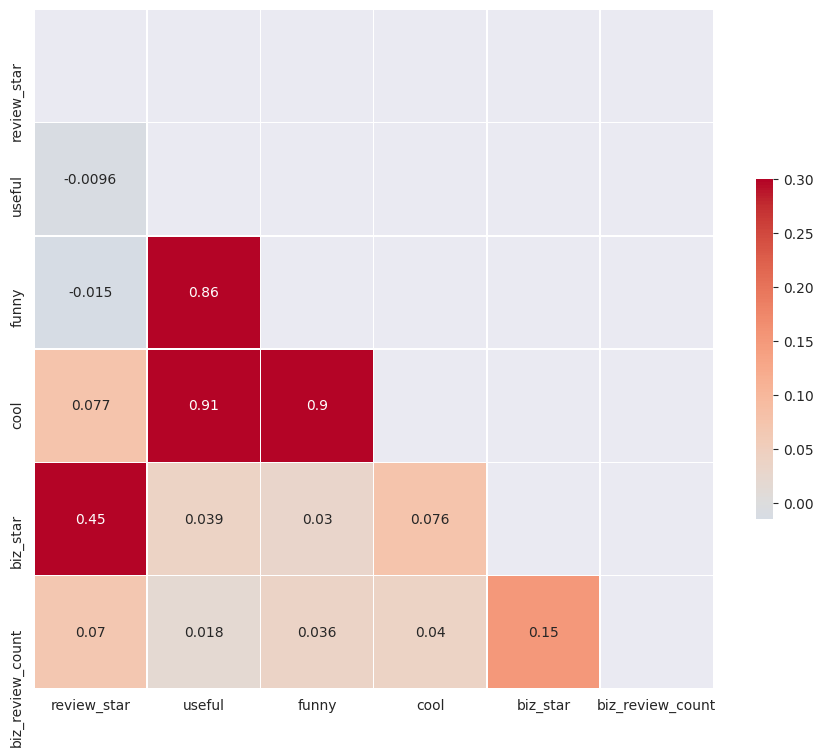

In [ ]:
mask = np.triu(np.ones_like(corr, dtype=np.bool))

f, ax = plt.subplots(figsize=(11, 9))

sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=.3, center=0, annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Insights


1.   Users table has 39063 rows,34 columns, and have some missing data.
2.   Once again, funny, useful and cool have strong correlation which indicates that PCA might be a useful tool to model.



## 2.**Feature Engineering**

In [ ]:
# zipcode review count
x = reviews.groupby(['user_id','postal_code'], sort = True)[['review_id']].count().rename(columns={'review_id':'Number_review_per_code_per_user_id'})
x=x.unstack(level=1).fillna(0)

estimated_zipcode_mapping=x.idxmax(axis=1).apply(lambda x: x[1])
users.index= users.user_id
users['estimated_zipcode']=estimated_zipcode_mapping

users.reset_index(drop=True, inplace=True)
y = reviews.groupby(['user_id','postal_code'], sort = True)[['review_id']].count().reset_index().rename(columns={'review_id':'zipcode_review_count'})
users = pd.merge(left = users, right = y, left_on= ['user_id', 'estimated_zipcode'], right_on= ['user_id', 'postal_code'], how = 'left')

In [ ]:
# number of zipcode 
x = reviews.groupby('user_id')['postal_code'].count().reset_index().rename(columns = {'postal_code':'zipcode_num'})
users = pd.merge(left = users, right = x, on= 'user_id', how = 'left')

In [ ]:
# city review count
x = reviews.groupby(['user_id','city'], sort = True)[['review_id']].count().rename(columns={'review_id':'Number_review_per_city_per_user_id'})
x=x.unstack(level=1).fillna(0)

estimated_city_mapping=x.idxmax(axis=1).apply(lambda x: x[1])
users.index= users.user_id
users['estimated_city']=estimated_city_mapping

users.reset_index(drop=True, inplace=True)
y = reviews.groupby(['user_id','city'], sort = True)[['review_id']].count().reset_index().rename(columns={'review_id':'city_review_count'})
users = pd.merge(left = users, right = y, left_on= ['user_id', 'estimated_city'], right_on= ['user_id', 'city'], how = 'left')

In [ ]:
# number of city 
x = reviews.groupby('user_id')['city'].count().reset_index().rename(columns = {'city':'city_num'})
users = pd.merge(left = users, right = x, on= 'user_id', how = 'left')

In [ ]:
# number of state 
x = reviews.groupby('user_id')['state'].count().reset_index().rename(columns = {'city':'state_num'})
users = pd.merge(left = users, right = x, on= 'user_id', how = 'left')

In [ ]:
# frequency: days per review
users['max_review_date'] = users.last_review_date.max()
users['max_review_date'] = pd.to_datetime(users['max_review_date']).dt.date
users['yelping_since'] = pd.to_datetime(users['yelping_since']).dt.date

users['CurrentDate_YelpingSince'] =  (users['max_review_date'] - users['yelping_since'])/np.timedelta64(1, 'D') + 3
users['Days_Per_Review'] = users['CurrentDate_YelpingSince']/users.review_count

In [ ]:
reviews.columns

Index(['review_id', 'user_id', 'business_id', 'review_star', 'useful', 'funny',
       'cool', 'review_date', 'name', 'address', 'city', 'state',
       'postal_code', 'latitude', 'longitude', 'biz_star', 'biz_review_count',
       'is_open', 'attributes.BusinessAcceptsCreditCards',
       'attributes.ByAppointmentOnly', 'attributes.DogsAllowed',
       'attributes.BikeParking', 'attributes.BusinessParking',
       'attributes.RestaurantsPriceRange2', 'categories', 'hours.Monday',
       'hours.Tuesday', 'hours.Wednesday', 'hours.Thursday', 'hours.Friday',
       'text', 'tip_date', 'compliment_count', 'checkin_date'],
      dtype='object')

In [ ]:
# average review count by one day
reviews['review_date'] = pd.to_datetime(reviews['review_date']).dt.date
r = reviews.groupby(['user_id','review_date'])['review_id'].count().reset_index()


In [ ]:
r.rename(columns = {'review_id': 'review_cnt_one_day'}, inplace = True)
d = r.groupby('user_id')['review_cnt_one_day'].mean().reset_index().rename(columns = {'review_cnt_one_day': 'avg_review_cnt_one_day'})
users = pd.merge(left = users, right = d, on = 'user_id', how = 'left')

In [ ]:
# other features
users['comments'] = users['cool'] + users['funny'] + users['useful']
users['commentsPreview'] = users['comments']/users['review_count']
users['compliments'] = users['compliment_cool'] + users['compliment_cute'] + users['compliment_funny'] +users['compliment_hot'] +users['compliment_list'] +users['compliment_more'] + users['compliment_note'] +users['compliment_photos'] + users['compliment_plain'] +users['compliment_profile'] + users['compliment_writer']
users['complimentsPreview'] = round(users['compliments']/users['review_count'],2)
users['compliments_writerPreview'] = round(users['compliment_writer']/users['review_count'],2)
users['compliment_photosPreview'] = round(users['compliment_photos']/users['review_count'],2)
users['fansPreview'] = round(users['fans']/users['review_count'],2)
users['friendsPreview'] = round(users['friends']/users['review_count'],2)

users['state_review_rate'] = round(users['state_review_count'] / users['review_cnt_rt'],2)
users['zipcode_review_rate'] = round(users['zipcode_review_count'] / users['review_cnt_rt'],2)
users['city_review_rate'] = round(users['city_review_count'] / users['review_cnt_rt'],2)

In [ ]:
def elite_num(x):
  if type(x) == str:
    x = x.split('-')
    return len(x)
  else:
    return 0

In [ ]:
users['elite_years'] = users.elite.map(elite_num)

In [ ]:
users['daysPfans'] = round(users['CurrentDate_YelpingSince']/users['fans'],2)
users['daysPfriends'] = round(users['CurrentDate_YelpingSince']/users['friends'],2)

In [ ]:
users.recency

0       233.0
1       337.0
2       356.0
3       332.0
4        35.0
        ...  
8157    331.0
8158    306.0
8159    262.0
8160    281.0
8161    293.0
Name: recency, Length: 8162, dtype: float64

In [ ]:
def recency_group(x):
    if x <=14:
        return 1
    elif (x >7) & (x <= 30):
        return 2
    elif (x> 30) & (x <= 90):
        return 3
    elif (x> 90) & (x<= 180):
        return 4
    elif (x> 180) & (x<= 270):
        return 5
    else:
        return 6

In [ ]:
users['recency_group'] = users.recency.map(recency_group)

In [ ]:
users['register_years'] = round(users['CurrentDate_YelpingSince']/365,2)

In [ ]:
users.head(1)

,user_id,review_count,yelping_since,useful,funny,cool,elite,friends,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,estimated_state,first_review_date,last_review_date,state_x,state_review_count,review_cnt_rt,total_review_minus,recency,review_start_days,estimated_zipcode,postal_code,zipcode_review_count,zipcode_num,estimated_city,city,city_review_count,city_num,state_y,max_review_date,CurrentDate_YelpingSince,Days_Per_Review,avg_review_cnt_one_day,comments,commentsPreview,compliments,complimentsPreview,compliments_writerPreview,compliment_photosPreview,fansPreview,friendsPreview,state_review_rate,zipcode_review_rate,city_review_rate,elite_years,daysPfans,daysPfriends,recency_group,register_years
0,8ZryN_S-n48g6rsa3W3QtQ,2474,2008-10-27,51923,42361,46814,2009-2010-2012-2013-2014-2015-2016-2017-2018,2084,365,3.35,4967,623,349,105,136,1746,2794,4843,4843,2492,1797,NV,2009-07-28,2019-04-24,NV,42,43,2431,233.0,274.0,89109,89109,11,43,Las Vegas,Las Vegas,40,43,43,2019-12-13,4067.0,1.643897,1.02381,141098,57.032336,24695,9.98,1.01,0.73,0.15,0.84,0.98,0.26,0.93,9,11.14,1.95,5,11.14


# Plot

In [ ]:
features = ['yelping_since','recency_group', 'recency', 'Days_Per_Review', 'avg_review_cnt_one_day','state_review_rate', 'zipcode_review_rate','city_review_rate', 
            'review_count', 'review_cnt_rt','zipcode_num', 'city_num','average_stars', 'fans',
            'friends', 'fansPreview','friendsPreview', 'commentsPreview', 'elite_years','complimentsPreview',
            'compliments_writerPreview','compliment_photosPreview','daysPfans','daysPfriends','register_years']

In [ ]:
train_raw = users[features]

In [ ]:
import seaborn as sns

In [ ]:
# sns.pairplot(train_raw)

In [ ]:
import datetime as dt
train_raw = train_raw[(train_raw.review_count >2) & (train_raw.yelping_since <= dt.date(2019,11,30))]

In [ ]:
# sns.pairplot(train_raw)

In [ ]:
corr = train_raw.corr()


In [ ]:
corr

In [ ]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
#cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=.3, center=0, annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [ ]:
features = ['recency_group', 'Days_Per_Review', 'avg_review_cnt_one_day','state_review_rate', 'zipcode_review_rate','city_review_rate', 
            'review_count', 'review_cnt_rt','zipcode_num', 'city_num','average_stars', 'fans',
            'friends', 'fansPreview','friendsPreview', 'commentsPreview', 'elite_years','complimentsPreview',
            'compliments_writerPreview','compliment_photosPreview','register_years']

In [ ]:
features = ['recency_group', 'Days_Per_Review', 'avg_review_cnt_one_day',
            'zipcode_num',  'fans',
            'friends', 'commentsPreview', 'elite_years','complimentsPreview',
            'compliments_writerPreview','compliment_photosPreview']

In [ ]:
train = train_raw[features]

In [ ]:
# features = ['Days_Per_Review', 'avg_review_cnt_one_day','state_review_rate', 'city_review_rate', 
#             'zipcode_num',  'fans',
#             'friends',  'commentsPreview', 'elite_years','complimentsPreview'
#             ]
# train = train_raw[features]

In [ ]:
train.dropna( inplace = True)

In [ ]:
scaler = MinMaxScaler()
train_sc = scaler.fit_transform(train)

In [ ]:
pca = PCA(n_components = 8)
pca_tf = pca.fit_transform(train_sc)
pca_score = pca.explained_variance_ratio_
train_pca = pca.components_

In [ ]:
pca_score

In [ ]:
%matplotlib inline
plt.figure(figsize = [15, 10])
# fig.suptitle('PCA Component', fontsize=10, fontweight='bold')
x_pos = np.arange(len(pca_score))
cum_var_exp = np.cumsum(pca_score)
x_label = list(range(1,6))
plt.bar(x_pos, pca_score)
plt.plot(x_pos, cum_var_exp,marker='o')
plt.xticks(x_pos, x_label)
plt.title('Explained variance ratio', fontsize = 15)
plt.show()

In [ ]:
#Y axis is PCA components 1
%matplotlib inline
fig=plt.figure(figsize = [15, 10])
fig.suptitle('PCA Component', fontsize=10, fontweight='bold')
plt.barh(y=train.columns,width=pca.components_[0], label = 'component 1')
plt.barh(y=train.columns,width=pca.components_[1], label = 'component 2')
plt.barh(y=train.columns,width=pca.components_[2], label = 'component 3')
plt.barh(y=train.columns,width=pca.components_[3], label = 'component 4')
plt.legend(loc = 'upper right')

plt.show()

In [ ]:
def plot_pca_2d(train_sc, pred=None):
    # run pca
    pca = PCA(n_components = 2)
    pca.fit(train_sc)

    # Store results of PCA in a data frame
    result=pd.DataFrame(pca.transform(train_sc), columns=['PCA%i' % i for i in range(2)], index=train.index)

    # Plot initialisation
    fig = plt.figure(figsize=[10,6])
    plt.scatter(result['PCA0'], result['PCA1'], c= pred, cmap="Set2_r", s=60)
    return result

In [ ]:
%matplotlib inline
train_pca_2 = plot_pca_2d(train_sc)


In [ ]:
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
def plot_pca(train_sc):
    # run pca
    pca = PCA(n_components = 3)
    pca.fit(train_sc)

    # Store results of PCA in a data frame
    result=pd.DataFrame(pca.transform(train_sc), columns=['PCA%i' % i for i in range(3)], index=train.index)

    # Plot initialisation
    fig = plt.figure(figsize=[20,18])
    ax = fig.add_subplot(1,1,1, projection='3d')
    ax.scatter(result['PCA0'], result['PCA1'], result['PCA2'],  cmap="Set2_r", s=60)

    # make simple, bare axis lines through space:
    xAxisLine = ((min(result['PCA0']), max(result['PCA0'])), (0, 0), (0,0))
    ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
    yAxisLine = ((0, 0), (min(result['PCA1']), max(result['PCA1'])), (0,0))
    ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
    zAxisLine = ((0, 0), (0,0), (min(result['PCA2']), max(result['PCA2'])))
    ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')

    # label the axes
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    ax.set_zlabel("PC3")
    ax.set_title("PCA", fontsize = 10)
    plt.show()
    return result

In [ ]:
#pip install matplotlib
%matplotlib inline
train_pca_3 = plot_pca(train_sc)

In [ ]:
from sklearn.cluster import KMeans 

In [ ]:
K = list(range(1,15))
sse = []

for k in K:
    model = KMeans(n_clusters = k)
    #model.fit(train_sc)
    model.fit(train_pca_3)
    sse.append(model.inertia_)

In [ ]:
%matplotlib inline
plt.plot(K, sse,marker='o')

In [ ]:
from sklearn.metrics import silhouette_score as ss
K = list(range(2,10))
ss_score = []

for k in K:
    model = KMeans(n_clusters = k)
#     model.fit(train_sc)
    model.fit(train_pca_3)
    pred = model.labels_
    ss_score.append(ss(train_sc, pred))

In [ ]:
plt.plot(K, ss_score, marker = 'o') 
plt.title('Silhouette Score', fontsize = '12')

In [ ]:
model = KMeans(n_clusters = 7)
# model.fit(train_sc)
model.fit(train_pca_3)
pred = model.labels_

In [ ]:
def plot_pca_label(pred):
    #run pca
    pca = PCA(n_components = 3)
    pca.fit(train_sc)

    # Store results of PCA in a data frame
    result=pd.DataFrame(pca.transform(train_sc), columns=['PCA%i' % i for i in range(3)], index=train.index)

    # Plot initialisation

    fig = plt.figure(figsize=[20,18])
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(result['PCA0'], result['PCA1'], result['PCA2'], c=pred, cmap="Set2_r", s=60)

    # make simple, bare axis lines through space:
    xAxisLine = ((min(result['PCA0']), max(result['PCA0'])), (0, 0), (0,0))
    ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
    yAxisLine = ((0, 0), (min(result['PCA1']), max(result['PCA1'])), (0,0))
    ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
    zAxisLine = ((0, 0), (0,0), (min(result['PCA2']), max(result['PCA2'])))
    ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')

    # label the axes
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    ax.set_zlabel("PC3")
    ax.set_title("PCA", fontsize = 10)
    plt.show()

In [ ]:
# %matplotlib qt
%matplotlib inline

In [ ]:
plot_pca_label(pred)

In [ ]:
%matplotlib inline
plot_pca_2d(train_sc, pred)

In [ ]:
np.unique(pred, return_counts=True)

In [ ]:
train.groupby(pred).mean().reset_index()

In [ ]:
train.groupby(pred).median().reset_index()

### try different clustering:


In [ ]:
from sklearn.svm import SVC

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_matrix = linkage(train_pca_3, 'ward')
dendrogram(linkage_matrix, color_threshold=2.0)
plt.title('Dendrogram')
plt.xlabel('Data')
plt.xticks([])
plt.ylabel('distance')

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
aggmodel = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='complete')

In [ ]:
aggmodel.fit(train_pca_3)

In [ ]:
agglabel = aggmodel.labels_

In [ ]:
plot_pca_label(agglabel)

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
model_db = DBSCAN(eps = 0.15, min_samples = 4, algorithm='auto', metric='euclidean')
model_db.fit(train_pca_3)
db_labels = model_db.labels_

In [ ]:
np.unique(db_labels)

In [ ]:
plot_pca_label(db_labels)

In [ ]:
plot_pca_2d(train_sc, db_labels)